<a href="https://colab.research.google.com/github/pumazzo/corso_AML_2025/blob/main/3d_image_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) MONAI Consortium  
Licensed under the Apache License, Version 2.0 (the "License");  
you may not use this file except in compliance with the License.  
You may obtain a copy of the License at  
&nbsp;&nbsp;&nbsp;&nbsp;http://www.apache.org/licenses/LICENSE-2.0  
Unless required by applicable law or agreed to in writing, software  
distributed under the License is distributed on an "AS IS" BASIS,  
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  
See the License for the specific language governing permissions and  
limitations under the License.

# Overview

This notebook introduces you MONAI's transformation module for 3D images.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Project-MONAI/tutorials/blob/main/modules/3d_image_transforms.ipynb)

## Setup environment

In [1]:
!python -c "import monai" || pip install -q "monai-weekly[nibabel]"
!python -c "import matplotlib" || pip install -q matplotlib

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'monai'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 52.4 MB/s eta 0:00:00


## Setup imports

In [2]:
from monai.transforms import (
    EnsureChannelFirstd,
    LoadImage,
    LoadImaged,
    Orientationd,
    Rand3DElasticd,
    RandAffined,
    Spacingd,
)
from monai.config import print_config
from monai.apps import download_and_extract
import numpy as np
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob

print_config()

MONAI version: 1.5.dev2512
Numpy version: 2.0.2
Pytorch version: 2.6.0+cu124
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: e4701e24c97d1f8c7ba40777c238cdfe14b04581
MONAI __file__: /usr/local/lib/python3.11/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.14.1
Pillow version: 11.1.0
Tensorboard version: 2.18.0
gdown version: 5.2.0
TorchVision version: 0.21.0+cu124
tqdm version: 4.67.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 2.2.2
einops version: 0.8.1
transformers version: 4.50.0
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io

## Setup data directory

You can specify a directory with the `MONAI_DATA_DIRECTORY` environment variable.  
This allows you to save results and reuse downloads.  
If not specified a temporary directory will be used.

In [3]:
directory = os.environ.get("MONAI_DATA_DIRECTORY")
if directory is not None:
    os.makedirs(directory, exist_ok=True)
root_dir = tempfile.mkdtemp() if directory is None else directory
print(f"root dir is: {root_dir}")

root dir is: /tmp/tmp87dmy61f


## Download dataset

Downloads and extracts the dataset.  
The dataset comes from http://medicaldecathlon.com/.

In [4]:
resource = "https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar"
md5 = "410d4a301da4e5b2f6f86ec3ddba524e"

compressed_file = os.path.join(root_dir, "Task09_Spleen.tar")
data_dir = os.path.join(root_dir, "Task09_Spleen")
if not os.path.exists(data_dir):
    download_and_extract(resource, compressed_file, root_dir, md5)

Task09_Spleen.tar: 1.50GB [00:49, 32.5MB/s]                            

2025-03-27 09:16:09,095 - INFO - Downloaded: /tmp/tmp87dmy61f/Task09_Spleen.tar


2025-03-27 09:16:12,518 - INFO - Verified 'Task09_Spleen.tar', md5: 410d4a301da4e5b2f6f86ec3ddba524e.
2025-03-27 09:16:12,519 - INFO - Writing into directory: /tmp/tmp87dmy61f.


## Set MSD Spleen dataset path

The following groups images and labels from `Task09_Spleen/imagesTr` and `Task09_Spleen/labelsTr` into pairs.

In [5]:
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*.nii.gz")))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_data_dicts, val_data_dicts = data_dicts[:-9], data_dicts[-9:]

The image file names are organised into a list of dictionaries.

In [6]:
train_data_dicts[0]

{'image': '/tmp/tmp87dmy61f/Task09_Spleen/imagesTr/spleen_10.nii.gz',
 'label': '/tmp/tmp87dmy61f/Task09_Spleen/labelsTr/spleen_10.nii.gz'}

The list of data dictionaries, `train_data_dicts`,
could be used by PyTorch's data loader.

For example,

```python
from torch.utils.data import DataLoader

data_loader = DataLoader(train_data_dicts)
for training_sample in data_loader:
    # run the deep learning training with training_sample
```

The rest of this tutorial presents a set of "transforms"
converting `train_data_dict` into data arrays that will
eventually be consumed by the deep learning models.

## Load the NIfTI files

One design choice of MONAI is that it provides not only the high-level workflow components,
but also relatively lower level APIs in their minimal functioning form.

For example, a `LoadImage` class is a simple callable wrapper of the underlying `Nibabel` image loader.
After constructing the loader with a few necessary system parameters,
calling the loader instance with a `NIfTI` filename will return the image data arrays,
as well as the metadata -- such as affine information and voxel sizes.

In [7]:
loader = LoadImage(dtype=np.float32, image_only=True)

In [8]:
image = loader(train_data_dicts[0]["image"])
# print(f"input: {train_data_dicts[0]['image']}")
print(f"image shape: {image.shape}")
print(f"image affine:\n{image.meta['affine']}")
print(f"image pixdim:\n{image.pixdim}")

image shape: torch.Size([512, 512, 55])
image affine:
tensor([[   0.9766,    0.0000,    0.0000, -499.0232],
        [   0.0000,    0.9766,    0.0000, -499.0232],
        [   0.0000,    0.0000,    5.0000,    0.0000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9766, 5.0000], dtype=torch.float64)


Oftentimes, we want to load a group of inputs as a training sample.
For example training a supervised image segmentation network requires a pair of image and label as a training sample.

To ensure a group of inputs are being preprocessed consistently,
MONAI also provides dictionary-based interfaces for the minimal functioning transforms.

`LoadImaged` is the corresponding dict-based version of `LoadImage`:

In [9]:
loader = LoadImaged(keys=("image", "label"), image_only=False)

In [10]:
data_dict = loader(train_data_dicts[0])
# print(f"input:, {train_data_dicts[0]}")
print(f"image shape: {data_dict['image'].shape}")
print(f"label shape: {data_dict['label'].shape}")
print(f"image pixdim:\n{data_dict['image'].pixdim}")

image shape: torch.Size([512, 512, 55])
label shape: torch.Size([512, 512, 55])
image pixdim:
tensor([0.9766, 0.9766, 5.0000], dtype=torch.float64)


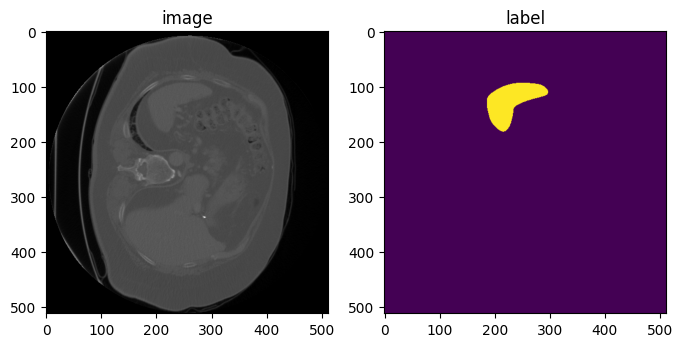

In [11]:
image, label = data_dict["image"], data_dict["label"]
plt.figure("visualize", (8, 4))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, 30], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, 30])
plt.show()

## Ensure the first dimension is channel

Most of MONAI's image transformations assume that the input data has the shape:  
`[num_channels, spatial_dim_1, spatial_dim_2, ... ,spatial_dim_n]`  
so that they could be interpreted consistently (as "channel-first" is commonly used in PyTorch).  
Here the input image has shape `(512, 512, 55)` which isn't in the acceptable shape (missing the channel dimension),  
we therefore create a transform which is called to update the shape:

In [12]:
ensure_channel_first = EnsureChannelFirstd(keys=["image", "label"])
datac_dict = ensure_channel_first(data_dict)
print(f"image shape: {datac_dict['image'].shape}")

image shape: torch.Size([1, 512, 512, 55])


Now we are ready to do some intensity and spatial transforms.

## Reorientation to a designated axes codes

Sometimes it is nice to have all the input volumes in a consistent axes orientation.  
The default axis labels are Left (L), Right (R), Posterior (P), Anterior (A), Inferior (I), Superior (S).  
The following transform is created to reorientate the volumes to have 'Posterior, Left, Inferior' (PLI) orientation (To ensure the spatial axes are processed consistently across the subjects, this orientation transform should be put before any anisotropic spatial transforms):

In [13]:
orientation = Orientationd(keys=["image", "label"], axcodes="PLI")

In [14]:
data_dict = orientation(datac_dict)
print(f"image shape: {data_dict['image'].shape}")
print(f"label shape: {data_dict['label'].shape}")
print(f"image affine after Spacing:\n{data_dict['image'].meta['affine']}")
print(f"label affine after Spacing:\n{data_dict['label'].meta['affine']}")

image shape: torch.Size([1, 512, 512, 55])
label shape: torch.Size([1, 512, 512, 55])
image affine after Spacing:
tensor([[ 0.0000e+00, -9.7656e-01,  0.0000e+00,  4.7684e-07],
        [-9.7656e-01,  0.0000e+00,  0.0000e+00,  4.7684e-07],
        [ 0.0000e+00,  0.0000e+00, -5.0000e+00,  2.7000e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label affine after Spacing:
tensor([[ 0.0000e+00, -9.7656e-01,  0.0000e+00,  4.7684e-07],
        [-9.7656e-01,  0.0000e+00,  0.0000e+00,  4.7684e-07],
        [ 0.0000e+00,  0.0000e+00, -5.0000e+00,  2.7000e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


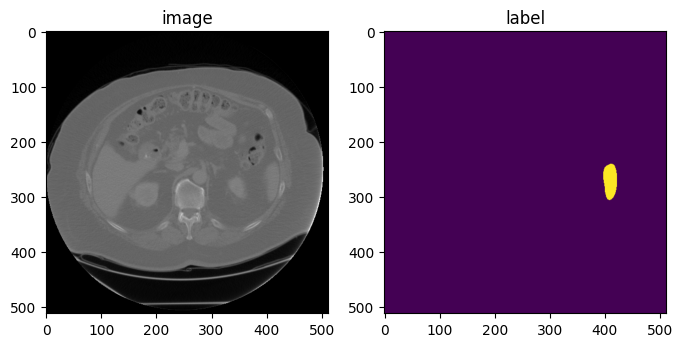

In [15]:
image, label = data_dict["image"], data_dict["label"]
plt.figure("visualise", (8, 4))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[0, :, :, 30], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[0, :, :, 30])
plt.show()

## Resample to a consistent voxel size

The input volumes might have different voxel sizes.  
The following transform is created to normalise the volumes to have (1.5, 1.5, 5.) millimetre voxel size.  
The transform is set to read the original voxel size information from `data_dict['image'].affine`,  
which is from the corresponding NIfTI file, loaded earlier by `LoadImaged`.

In [16]:
spacing = Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 5.0), mode=("bilinear", "nearest"))

In [17]:
data_dict = spacing(data_dict)
print(f"image shape: {data_dict['image'].shape}")
print(f"label shape: {data_dict['label'].shape}")
print(f"image affine after Spacing:\n{data_dict['image'].meta['affine']}")
print(f"label affine after Spacing:\n{data_dict['label'].meta['affine']}")

image shape: torch.Size([1, 334, 334, 55])
label shape: torch.Size([1, 334, 334, 55])
image affine after Spacing:
tensor([[ 0.0000e+00, -1.5000e+00,  0.0000e+00,  4.7684e-07],
        [-1.5000e+00,  0.0000e+00,  0.0000e+00,  4.7684e-07],
        [ 0.0000e+00,  0.0000e+00, -5.0000e+00,  2.7000e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)
label affine after Spacing:
tensor([[ 0.0000e+00, -1.5000e+00,  0.0000e+00,  4.7684e-07],
        [-1.5000e+00,  0.0000e+00,  0.0000e+00,  4.7684e-07],
        [ 0.0000e+00,  0.0000e+00, -5.0000e+00,  2.7000e+02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],
       dtype=torch.float64)


To track the spacing changes, the data_dict was updated by `Spacingd`:
* An `image.meta['original_affine']` key is added to the `data_dict`, logs the original affine.
* An `image.affine` key is updated to have the current affine.

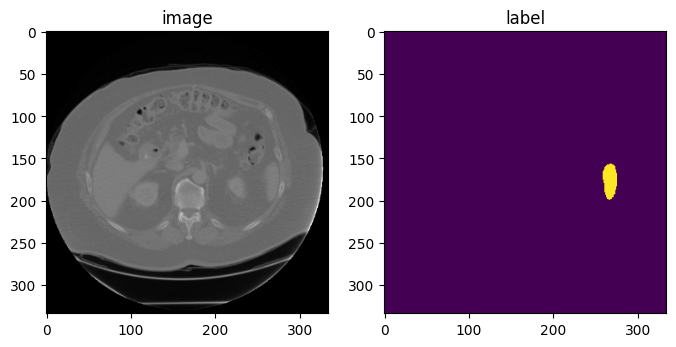

In [18]:
image, label = data_dict["image"], data_dict["label"]
plt.figure("visualise", (8, 4))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[0, :, :, 30], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[0, :, :, 30])
plt.show()

## Random affine transformation

The following affine transformation is defined to output a (300, 300, 50) image patch.  
The patch location is randomly chosen in a range of (-40, 40), (-40, 40), (-2, 2) in x, y, and z axes respectively.  
The translation is relative to the image centre.  
The 3D rotation angle is randomly chosen from (-45, 45) degrees around the z axis, and 5 degrees around x and y axes.  
The random scaling factor is randomly chosen from (1.0 - 0.15, 1.0 + 0.15) along each axis.

In [19]:
rand_affine = RandAffined(
    keys=["image", "label"],
    mode=("bilinear", "nearest"),
    prob=1.0,
    spatial_size=(300, 300, 50),
    translate_range=(40, 40, 2),
    rotate_range=(np.pi / 36, np.pi / 36, np.pi / 4),
    scale_range=(0.15, 0.15, 0.15),
    padding_mode="border",
)
rand_affine.set_random_state(seed=123)

You can rerun this cell to generate a different randomised version of the original image.

image shape: torch.Size([1, 300, 300, 50])


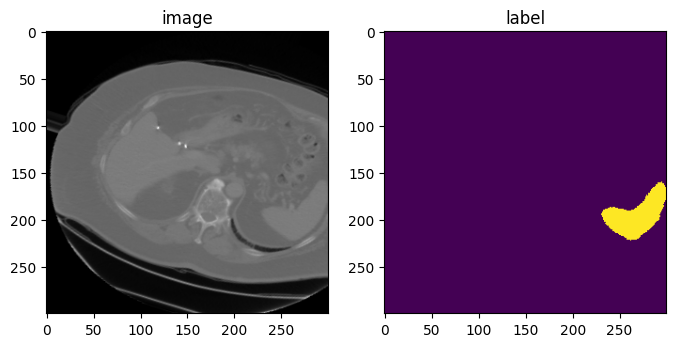

In [20]:
affined_data_dict = rand_affine(data_dict)
print(f"image shape: {affined_data_dict['image'].shape}")

image, label = affined_data_dict["image"][0], affined_data_dict["label"][0]
plt.figure("visualise", (8, 4))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, 23], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, 23])
plt.show()

## Random elastic deformation

Similarly, the following elastic deformation is defined to output a (300, 300, 10) image patch.  
The image is resampled from a combination of affine transformations and elastic deformations.  
`sigma_range` controls the smoothness of the deformation (larger than 15 could be slow on CPU)  
`magnitude_range` controls the amplitude of the deformation (large than 500, the image becomes unrealistic).

In [21]:
rand_elastic = Rand3DElasticd(
    keys=["image", "label"],
    mode=("bilinear", "nearest"),
    prob=1.0,
    sigma_range=(5, 8),
    magnitude_range=(100, 200),
    spatial_size=(300, 300, 10),
    translate_range=(50, 50, 2),
    rotate_range=(np.pi / 36, np.pi / 36, np.pi),
    scale_range=(0.15, 0.15, 0.15),
    padding_mode="border",
)
rand_elastic.set_random_state(seed=123)

You can rerun this cell to generate a different randomised version of the original image.

image shape: torch.Size([1, 300, 300, 10])


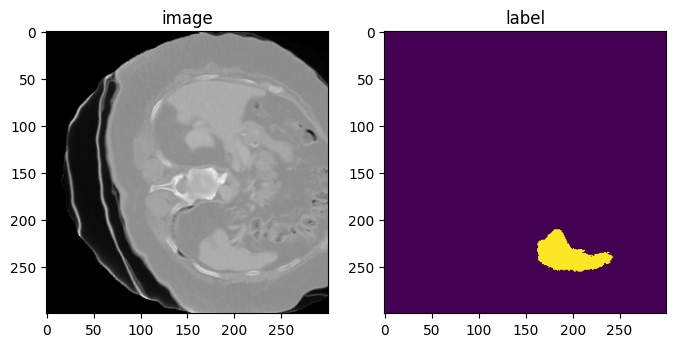

In [22]:
deformed_data_dict = rand_elastic(data_dict)
print(f"image shape: {deformed_data_dict['image'].shape}")

image, label = deformed_data_dict["image"][0], deformed_data_dict["label"][0]
plt.figure("visualise", (8, 4))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, 5], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, 5])
plt.show()

## Cleanup data directory

Remove directory if a temporary was used.

In [23]:
if directory is None:
    shutil.rmtree(root_dir)